In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import scipy.io as sio

In [682]:
for im_name in tqdm(os.listdir('jpg/')):
    if im_name.endswith('.jpg'):
        cv2.imwrite('jpg_res/'+im_name, cv2.resize(cv2.imread('jpg/'+im_name), (128, 128)))
        #all_images.append(cv2.cvtColor(cv2.imread('jpg_res/' + im_name), cv2.COLOR_RGB2LAB).reshape(-1, 3))

In [13]:
all_images = []
for im_name in tqdm(os.listdir('jpg_res/')):
    if im_name.endswith('.jpg'):
        all_images.append(cv2.cvtColor(cv2.imread('jpg_res/' + im_name), cv2.COLOR_RGB2LAB).reshape(-1, 3))
        
all_images = np.array(all_images)

In [6]:
im = cv2.resize(cv2.imread('jpg_res/105800.jpg'), (128, 128))
im2 = cv2.cvtColor(im, cv2.COLOR_RGB2LAB)

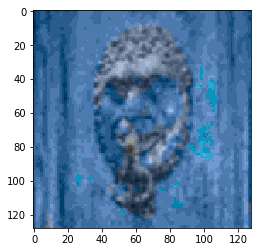

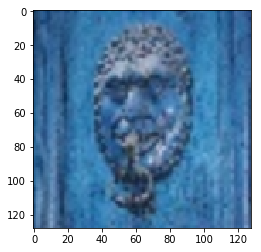

In [7]:
plt.imshow(cv2.cvtColor((np.round(im2/16)*16).astype(np.uint8), cv2.COLOR_LAB2RGB))
plt.figure()
plt.imshow(im)

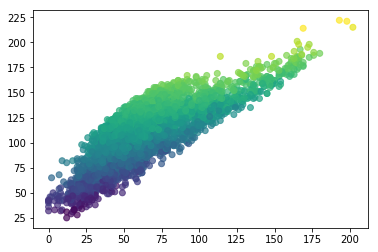

In [277]:
plt.scatter(im.reshape(-1, 3)[:, 0], im.reshape(-1, 3)[:, 1], c=im.reshape(-1, 3)[:, 2], alpha=0.7)

In [14]:
tmp = []
all_hists = []
cnt = 0
for im_name in tqdm(os.listdir('jpg_res/')):
    if im_name.endswith('.jpg'):
        im = cv2.cvtColor(cv2.imread('jpg_res/' + im_name), cv2.COLOR_RGB2LAB).reshape(-1, 3)
        his = np.histogramdd((np.round(im/8)).astype(np.uint8).reshape(-1, 3), bins=3*[np.arange(0,32)], normed=True)
        all_hists.append(his[0])
        cnt+=1
        
all_hists = np.array(all_hists).reshape(cnt, -1)

In [15]:
del all_images

In [10]:
all_hists.shape

(812, 29791)

In [498]:
def semi_dual_sag(a, b, c, eps, n_iter, return_iterates=False, lr_coef=3, return_pi=False):
    L = np.max(a/eps)
    
    n_source = a.shape[0]
    n_target = b.shape[0]
    
    step = lr_coef/(L*n_source)
    b.reshape
    vs = []
    gradh = []
    v = np.zeros((n_target, b.shape[1]))
    avg = np.zeros((n_target, b.shape[1]))
    g = np.zeros((n_source, n_target, b.shape[1]))
    
    indices = np.random.randint(0, n_source, n_iter)
    
    for n, i in enumerate(indices):
        avg -= g[i, :]
        
        val = (1/eps)*(v - c[i, :][:, None])

        tmp = b * np.exp(val - np.max(val)) # Softmax trick to avoid overflow in exp
        grad_h = b - tmp/tmp.sum()
        g[i, :] = a[i]*grad_h

        avg += g[i, :]
        v += step * avg
        
        if return_iterates and n%100==0:
            vs.append(v.copy())
            gradh.append(np.sum(np.abs(np.sum(g/n_source, axis=0))))

    if return_pi:
        pi = transport_plan_from_dual(v, eps, a, b, c)
        return pi
    
    if return_iterates:
        return None, np.array(vs), np.array(gradh)
    return vs


In [499]:
import ot
from sklearn.metrics import pairwise_distances
from tempfile import mkdtemp
import os.path as path
tmp = mkdtemp()
filename = path.join(tmp, 'newfile.dat')

In [500]:
def semi_dual_sag(a, b, c, eps, n_iter, return_iterates=False, lr_coef=3, return_pi=False):
    L = np.max(a/eps)
    
    n_source = a.shape[0]
    n_target = b.shape[0]
    
    step = lr_coef/(L*n_source)
    vs = []
    gradh = []
    v = np.zeros((n_target, b.shape[1]))
    avg = np.zeros((n_target, b.shape[1]))
    g = np.zeros((n_source, n_target, b.shape[1]))
    v_tilde = np.zeros((n_target, b.shape[1]))
    
    indices = np.random.randint(0, n_source, n_iter)
    
    for i in range(n_source):
        val = (1/eps)*(v - c[i, :][:, None])
        tmp = b * np.exp(val - np.max(val))
        grad_h = b - tmp/tmp.sum()
        
        g[i, :] = a[i] * grad_h
        
        v_tilde = v_tilde + (step/np.sqrt(i+1)) * g[i, :]
        v = (1/(i+1))*v_tilde + (1-(1/(i+1)))*v
    
    avg = np.mean(g, axis=0)
    
    for n, i in enumerate(indices):
        avg -= g[i, :]
        
        val = (1/eps)*(v - c[i, :][:, None])

        tmp = b * np.exp(val - np.max(val)) # Softmax trick to avoid overflow in exp
        grad_h = b - tmp/tmp.sum()
        g[i, :] = a[i]*grad_h

        avg += g[i, :]
        v += step * avg

        if return_iterates and n%100==0:
            vs.append(v.copy())
            gradh.append(np.sum(np.abs(np.sum(g/n_source, axis=0)), axis=0))

    if return_pi:
        pi = transport_plan_from_dual(v, eps, a, b, c)
        return pi
    
    if return_iterates:
        return None, np.array(vs), np.array(gradh)
    return vs

In [16]:
new_hists = all_hists[:, all_hists.sum(axis=0) > 0]

mesh = np.array(np.meshgrid(np.arange(0,31), np.arange(0,31), np.arange(0,31))).reshape(3, -1)
mesh = mesh[:, (all_hists.sum(axis=0) > 0)]

del all_hists

In [382]:
a = a_sink
#new_hists[0, :].reshape(-1, 1)
b = b_sink.reshape(-1, 1)
#new_hists[1:2, :].reshape(len(a), -1)
dists = dists_sink

In [383]:
res_vs_sinked = {}
res_gr_sinked = {}
eps=0.1
for lr_coef in [1, 3, 5]:
    n_iter=10000000
    L = np.max(a/eps)

    n_source = a.shape[0]
    n_target = b.shape[0]

    step = lr_coef/(L*n_source)
    vs1 = []
    gradh = []
    v = np.zeros((n_target, b.shape[1]))
    avg = np.zeros((n_target, b.shape[1]))
    g = np.zeros((n_source, n_target, b.shape[1]))
    sop = np.nonzero(a != 0)[0]
    indices = np.random.randint(0, len(sop), n_iter)


    for n in tqdm(range(n_iter)):
        i = sop[indices[n]]
        avg -= g[i, :]

        val = (1/eps)*(v - dists[i, :][:, None])

        tmp = b*np.exp(val)# - np.max(val)) # Softmax trick to avoid overflow in exp
        grad_h = b - tmp/tmp.sum()

        g[i, :] = a[i]*grad_h

        avg += g[i, :]

        v += step * avg

        if n%1000==0:
            vs1.append(v.copy())
            gradh.append(np.sum(np.abs(np.sum(g, axis=0)), axis=0))
            if n%100000==0:
                print(gradh[-1])
                
    res_vs_sinked[lr_coef] = np.array(vs1[:])
    res_gr_sinked[lr_coef] = np.array(gradh[1:])

[0.00096555]


KeyboardInterrupt: 

In [205]:
def transport_plan_from_dual(v, eps, a, b, c):
    u = -eps*np.log(np.sum(np.exp((v - c)/eps) * b, axis=1))
    pi = (np.exp((u[:, np.newaxis] + v[np.newaxis, :] - c)/eps)* 
                  a[:, np.newaxis] * b[np.newaxis, :])
    return pi


(transport_plan_from_dual(v.reshape(-1), eps, a, b[:, 0], dists) - s).max()


3.983922277142615e-09

In [ ]:
res_vs_saga = {}
res_gr_saga = {}
eps=0.01
for pn in tqdm(range(1, 10)):
    res_vs_saga[pn] = {}
    res_gr_saga[pn] = {}
    a = new_hists[0, :]
    b = new_hists[pn:pn+1, :]

    dists = np.zeros((4148, 4148))
    for i in range(mesh.shape[1]):
        q = mesh[:, i][:, None]
        p = mesh
    
        dists[i ,:] = np.sqrt(np.sum((q-p)**2, axis=0))
    
    dists/=np.median(dists)
    dists_sink = dists[a.reshape(-1)>0, :][:, b.reshape(-1)>0]
    dists = dists_sink
    
    a_sink = a[a>0]
    b_sink = b[b>0]
    
    a = a_sink
    b = b_sink.reshape(-1, 1)
    
    for lr_coef in tqdm([1/5, 1/3, 1, 3, 5]):
        n_iter=10000000
        L = np.max(a/eps)

        n_source = a.shape[0]
        n_target = b.shape[0]

        step = 1/(lr_coef*L)
        vs1 = []
        gradh = []
        v = np.zeros((n_target, b.shape[1]))
        avg = np.zeros((n_target, b.shape[1]))
        g = np.zeros((n_source, n_target, b.shape[1]))
        sop = np.nonzero(a != 0)[0]
        indices = np.random.randint(0, len(sop), n_iter)


        for n in tqdm(range(n_iter)):
            i = sop[indices[n]]

            tmp_grad = g[i, :].copy()

            val = (1/eps)*(v - dists[i, :][:, None])

            tmp = b*np.exp(val)# - np.max(val)) # Softmax trick to avoid overflow in exp
            grad_h = b - tmp/tmp.sum()

            g[i, :] = a[i]*grad_h

            diff = g[i, :] - tmp_grad
            v += step * (avg + diff)
            avg += diff / n_source

            if n%1000==0:
                vs1.append(v.copy())
                gradh.append(np.sum(np.abs(np.sum(g, axis=0)), axis=0))
                if n%100000==0:
                    print(gradh[-1])

        res_vs_saga[pn][lr_coef] = np.array(vs1[:])
        res_gr_saga[pn][lr_coef] = np.array(gradh[1:])

[0.00096417]
[0.71163985]
[0.31081994]
[0.19065269]
[0.17415413]
[0.15190387]
[0.12523758]
[0.1002113]
[0.0834451]
[0.06843477]
[0.06160939]
[0.05356086]
[0.05015661]
[0.04506496]
[0.04056273]
[0.03859948]
[0.03792264]
[0.03471712]
[0.03353369]
[0.0325866]
[0.02961007]
[0.02727725]
[0.02583796]
[0.02496385]
[0.02153512]
[0.02068174]
[0.02030378]
[0.01973688]
[0.0194697]
[0.0181873]
[0.01704902]
[0.01564325]
[0.01436528]
[0.01345093]
[0.01317526]
[0.01315816]
[0.01313362]
[0.01287502]
[0.01221118]
[0.01205956]
[0.01198856]
[0.01188089]
[0.01164051]
[0.01087195]
[0.01027791]
[0.01011671]
[0.01006525]
[0.00995836]
[0.00970235]
[0.00932118]
[0.00900574]
[0.00882927]
[0.00870013]
[0.00845813]
[0.00801498]
[0.00766193]
[0.00756657]
[0.00754103]
[0.00750028]
[0.00744719]
[0.00739275]
[0.00734642]
[0.00730863]
[0.00726677]
[0.00718246]
[0.00706503]
[0.0069635]
[0.0069009]
[0.00687918]
[0.00684843]
[0.00679288]
[0.00668224]
[0.00648075]
[0.00614763]
[0.00573934]
[0.00549067]
[0.00538169]
[0.005

[0.00011758]
[0.82761153]
[0.5897383]
[0.33058686]
[0.24577066]
[0.19063091]
[0.17953493]
[0.16701753]
[0.16005883]
[0.127465]
[0.12523157]
[0.11751681]
[0.0961991]
[0.08606081]
[0.08204555]
[0.0683495]
[0.0619927]
[0.06110608]
[0.05553032]
[0.05167939]
[0.0501521]
[0.04763914]
[0.04352058]
[0.04110719]
[0.03966639]
[0.03859952]
[0.03845456]
[0.03727847]
[0.03513107]
[0.0342935]
[0.03353786]
[0.03294922]
[0.03227421]
[0.03043926]
[0.02818773]
[0.02727804]
[0.02653692]
[0.02560739]
[0.0252262]
[0.02388499]
[0.02152801]
[0.0207379]
[0.02064765]
[0.02042696]
[0.02003107]
[0.01973699]
[0.01962569]
[0.01933139]
[0.01853075]
[0.01759483]
[0.01704221]
[0.01633162]
[0.0153001]
[0.01454837]
[0.01396234]
[0.0134487]
[0.01320076]
[0.01316925]
[0.01315932]
[0.0131539]
[0.01313352]
[0.01304443]
[0.01274226]
[0.01230927]
[0.01209438]
[0.01205955]
[0.01201999]
[0.0119703]
[0.011907]
[0.01181561]
[0.01163986]
[0.01125169]
[0.01069404]
[0.01034279]
[0.0102029]
[0.01011753]
[0.01008565]
[0.01005218]
[0.

[0.00059546]
[1.06437175]
[0.90378826]
[0.82714894]
[0.78199155]
[0.70958284]
[0.58904108]
[0.50103083]
[0.37102712]
[0.32990052]
[0.31077706]
[0.29053594]
[0.2455514]
[0.20852547]
[0.20334482]
[0.19062189]
[0.18700848]
[0.18333745]
[0.17947401]
[0.17815313]
[0.17405198]
[0.16700512]
[0.16462866]
[0.16266974]
[0.16003912]
[0.15180706]
[0.13875474]
[0.12748439]
[0.12652712]
[0.12630501]
[0.12522132]
[0.1231783]
[0.12197045]
[0.11742292]
[0.10733065]
[0.10007275]
[0.09612744]
[0.09420428]
[0.09038683]
[0.08596681]
[0.08334832]
[0.0828235]
[0.0820341]
[0.07891318]
[0.07416888]
[0.06831072]
[0.06411513]
[0.06259377]
[0.06198965]
[0.06183593]
[0.06160467]
[0.06109712]
[0.06003313]
[0.05808452]
[0.05551174]
[0.05342945]
[0.05242354]
[0.05166954]
[0.05117673]
[0.05062549]
[0.0501519]
[0.04971943]
[0.04882743]
[0.04763868]
[0.04640529]
[0.04501704]
[0.04351949]
[0.04244783]
[0.04176672]
[0.04109584]
[0.04054165]
[0.04015681]
[0.03966818]
[0.03910172]
[0.03870767]
[0.03859931]
[0.03857214]
[0.0

[0.0001206]
[1.43302181]
[1.20763147]
[1.06312981]
[0.96946652]
[0.93018797]
[0.90360306]
[0.87366343]
[0.84631978]
[0.8269894]
[0.81324306]
[0.79463118]
[0.78177629]
[0.76020622]
[0.73240322]
[0.70934587]
[0.67552561]
[0.63626554]
[0.5887258]
[0.55769208]
[0.53831665]
[0.50065176]
[0.43957914]
[0.3929012]
[0.37095097]
[0.3679842]
[0.36066066]
[0.32988688]
[0.31455001]
[0.31267957]
[0.31074095]
[0.30606944]
[0.29672241]
[0.29051311]
[0.28722658]
[0.27675869]
[0.24533754]
[0.23198796]
[0.22408938]
[0.20838776]
[0.2065806]
[0.20558391]
[0.20330307]
[0.19930246]
[0.19436106]
[0.19060718]
[0.18952534]
[0.18823707]
[0.18700516]
[0.18550793]
[0.1843951]
[0.18329872]
[0.18191331]
[0.18078413]
[0.17945929]
[0.17830768]
[0.17826727]
[0.17814919]
[0.17778164]
[0.17665383]
[0.17395587]
[0.17023901]
[0.16785]
[0.16700435]
[0.16655081]
[0.16573801]
[0.1646159]
[0.1634903]
[0.1630084]
[0.1626609]
[0.16205773]
[0.16116185]
[0.16002168]
[0.1584317]
[0.15566254]
[0.15176032]
[0.14869207]
[0.14476501]
[

[0.00024158]
[1.60772536]
[1.37137209]
[1.24157088]
[1.1510971]
[1.06275266]
[0.99212439]
[0.95853333]
[0.93400934]
[0.92239509]
[0.90349787]
[0.88282094]
[0.86956961]
[0.85214724]
[0.83710626]
[0.82697073]
[0.81981418]
[0.80753201]
[0.79637306]
[0.79087613]
[0.7816981]
[0.76718859]
[0.75519103]
[0.73883974]
[0.72368009]
[0.70930015]
[0.68985349]
[0.66846452]
[0.64444072]
[0.61671179]
[0.58865961]
[0.56553572]
[0.55366425]
[0.54267904]
[0.52697633]
[0.50041958]
[0.46348488]
[0.42801474]
[0.40098943]
[0.37915648]
[0.37094777]
[0.36917445]
[0.36719753]
[0.36341089]
[0.34860307]
[0.32984819]
[0.31895024]
[0.3137503]
[0.31294912]
[0.31197973]
[0.31073451]
[0.30847592]
[0.30449041]
[0.29852321]
[0.29314797]
[0.29051012]
[0.28897957]
[0.28598158]
[0.28001725]
[0.26649775]
[0.24524276]
[0.23463008]
[0.23101571]
[0.22652183]
[0.21718116]
[0.20838393]
[0.20677186]
[0.2064498]
[0.20586176]
[0.20485768]
[0.20330212]
[0.20112916]
[0.19825523]
[0.1953142]
[0.19257116]
[0.1906064]
[0.19000169]
[0.18

In [ ]:
som = 0
for i in range(mesh.shape[1]):

    val = ((v-dists[i, :][:, None])/eps)*b
    mx = val.max(axis=0)
    mx_id = np.argmax(val, axis=0)
    
    som += np.sum(v*b, axis=0) - eps*(mx + np.sum(np.exp(np.array([np.delete(val[:, i], mx_id[i]) for i in range(39)]).T - mx), axis=0)) - eps

In [184]:
eps=0.01

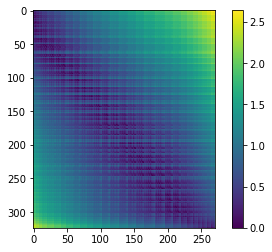

In [183]:
plt.imshow(dists)
plt.colorbar()

In [380]:
a = new_hists[0, :]
b = new_hists[2:3, :]

a_sink = a[a>0]
b_sink = b[b>0]

In [281]:
def sinkhorn(a, b, c, eps, tol=1e-3, max_iter=100000):
    K = np.exp(-c/eps)
    u, v = np.ones(a.shape[0]), np.ones(b.shape[0])
    vs = []
    niter = 0
    while niter < max_iter:
        u = a/(K.dot(v))
        v = b/(K.T.dot(u))

        niter += 1
        if niter%10 == 0:
            vs.append(eps*np.log(v))
            if np.linalg.norm(np.sum(np.abs(v.dot(K.T.dot(u))-b))) <= tol:
                print(niter)
                break

    return np.diag(u).dot(K).dot(np.diag(v)), eps*np.log(v), np.array(vs)

In [396]:
pi_sink, v_sink, vs_sink = sinkhorn(a, b.reshape(-1), dists, 0.01)

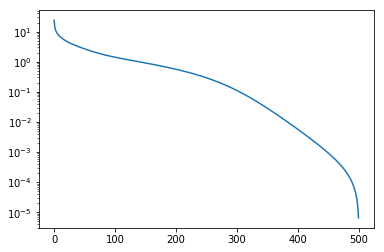

In [262]:
plt.semilogy(
    np.linalg.norm(
        (np.array(res_vs_saga[0.2])[::10, :, 0] -
         np.array(res_vs_saga[0.2])[::10, 0, 0][:, None]) - (np.array(res_vs_saga[0.2])[-1, :, 0] -
                                                             np.array(res_vs_saga[0.2])[-1, 0, 0]), axis=1))

In [30]:
for i in res_vs:
    res_vs[i] = np.array(res_vs[i])

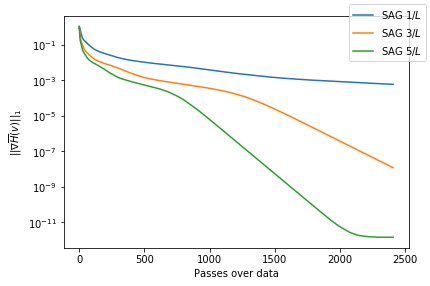

In [290]:
fig, ax = plt.subplots(figsize=(6, 4))

for lr_coef in [1, 3, 5]:
    ax.semilogy(np.arange(1, n_iter, 1000)[:-1]/new_hists.shape[1], 
                np.mean(res_gr_sinked[lr_coef], axis=1), label="SAG ${}/L$".format(lr_coef))

ax.set_xlabel("Passes over data") 
ax.set_ylabel(r"$\left|\left|\nabla\overline{H}(v)\right|\right|_1$") 
fig.legend()
fig.tight_layout()
#fig.savefig("sag_image_retreival.pdf")

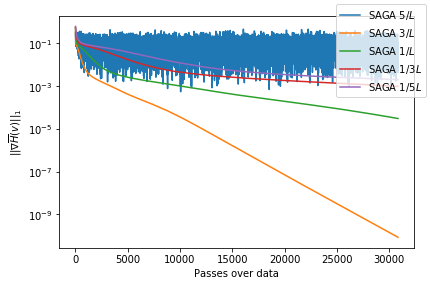

In [386]:
fig, ax = plt.subplots(figsize=(6, 4))

for lr_coef in [1/5, 1/3, 1, 3, 5]:
    if lr_coef==1/5:
        ax.semilogy(np.arange(1, n_iter, 1000)[:-1]/len(sop), 
                    np.mean(res_gr_saga[lr_coef], axis=1), label="SAGA $5/L$".format(lr_coef))
    elif lr_coef > 1:
        ax.semilogy(np.arange(1, n_iter, 1000)[:-1]/len(sop), 
                    np.mean(res_gr_saga[lr_coef], axis=1), label="SAGA $1/{:d}L$".format(int(lr_coef)))
    elif lr_coef == 1:
        ax.semilogy(np.arange(1, n_iter, 1000)[:-1]/len(sop), 
                    np.mean(res_gr_saga[lr_coef], axis=1), label="SAGA $1/L$".format(lr_coef))
    else:
        ax.semilogy(np.arange(1, n_iter, 1000)[:-1]/len(sop), 
                    np.mean(res_gr_saga[lr_coef], axis=1), label="SAGA ${:d}/L$".format(int(1/lr_coef)))

ax.set_xlabel("Passes over data") 
ax.set_ylabel(r"$\left|\left|\nabla\overline{H}(v)\right|\right|_1$") 
fig.legend()
fig.tight_layout()
#fig.savefig("saga_image_retreival.pdf")

In [388]:
sink = eps*special_log(v)

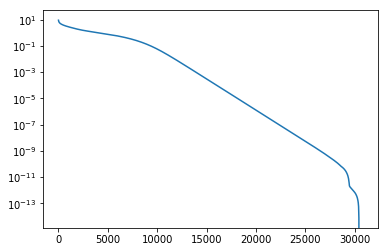

In [301]:
plt.semilogy(np.arange(0,n_iter, 10000)/a.shape[0],
         np.linalg.norm(res_vs_saga[1/5][::10, :, 0] - res_vs_saga[1/5][-1, :, 0].reshape(1, -1), axis=1))
#plt.plot(np.arange(0,100000, 10), 
#         np.linalg.norm(vs_sink - vs_sink[:, 0].reshape(-1, 1), axis=1))

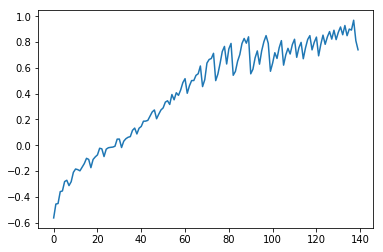

In [397]:
plt.plot(v_sink)

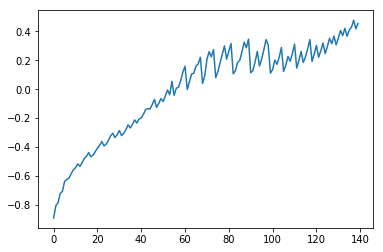

In [398]:
plt.plot(res_vs_saga[1/3][-1, :, 0])

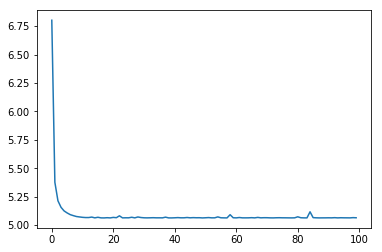

In [389]:
plt.plot(np.linalg.norm(v_sink-res_vs_saga[1/5][::100, :, 0], axis=1))



In [324]:
np.sum(a*(np.sum(b*v) -eps*np.log(np.sum(b.T * np.exp((v_sink-dists)/eps), axis=1)) - eps))

0.6358213558806036

In [326]:
np.sum(a*(np.sum(b*res_vs_saga[1/5][-1, :, 0]) - 
          eps*np.log(np.sum(b.T * np.exp((res_vs_saga[1/5][-1, :, 0]-dists)/eps), axis=1)) - eps))

0.7620485930901107

In [341]:
v.shape

(271, 1)

In [364]:
grad_sink = (a.reshape(-1, 1)*(b.T - np.exp((v_sink-dists)/eps)/np.sum(np.exp((v_sink-dists)/eps), 
                                                                       axis=1, keepdims=True))).sum(axis=0)



In [365]:
np.sum(np.abs(grad_sink), axis=0)

4.68510440268825e-16

In [ ]:
plt.semilogy(np.arange(1, n_iter, 10000)/a.shape[0], np.linalg.norm(np.array(vs_3_1[::10]) - vs[-1], axis=1))
plt.semilogy(np.arange(1, n_iter, 10000)/a.shape[0], np.linalg.norm(np.array(vs_3_01[::10]) - vs[-1], axis=1))
plt.semilogy(np.arange(1, n_iter, 10000)/a.shape[0], np.linalg.norm(np.array(vs_3_01_1[::10]) - vs[-1], axis=1))
plt.semilogy(np.arange(1, n_iter, 10000)/a.shape[0], np.linalg.norm(np.array(vs_3_01_5[::10]) - vs[-1], axis=1))

#plt.semilogy(np.arange(1, 250, 10), np.linalg.norm(np.array(vs) - vs[-1], axis=1))
#plt.xlim(-10, 800)
#plt.ylim(10**(-1), 10)

In [ ]:
plt.plot(np.linalg.norm(vs, axis=1))

In [20]:
new_hists.shape

(812, 4148)